In [11]:
import networkx as nx
from math import e
from itertools import permutations
import random
import math

In [13]:
#Выполните по вариантам соответственно реализацию генетического
#алгоритма в соответствии с приложенными начальными данными.

def qZ(x, y):
    return (x - 3 * y - 3) / (x ** 2 + 2 * y ** 2 + 1)


def qSumZ(Z):
    return sum(Z)


def exchangeScheme(oldX, oldY, sortdID):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortdID[2]]
    X[3] = oldX[sortdID[2]]
    X[0] = oldX[sortdID[0]]
    X[1] = oldX[sortdID[1]]

    Y[0] = oldY[sortdID[2]]
    Y[1] = oldY[sortdID[2]]
    Y[2] = oldY[sortdID[0]]
    Y[3] = oldY[sortdID[1]]

    return X, Y


def sorting(Z):
    sortedID = sorted(range(len(Z)), key=lambda k: Z[k])
    return sortedID


def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z


def evoSteps(X, Y):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

def main():
    X = [-5, -3, -2, -1]
    Y = [-1, -2, 0, 1]

    results = evoSteps(X, Y)

    for i in range(len(results[2])):
        print(f'max_{i + 1}_step: {results[2][i][2]}')

    qualityArrZ = []
    for i in range(len(results[2])):
        qualityArrZ += results[2][i][3]

    print(f'max Z: {max(qualityArrZ)}')

if __name__ == "__main__":
    main()

max_1_step: -2.928571428571429
max_2_step: -0.8319004524886877
max_3_step: -0.2676147382029735
max_4_step: 0.09502262443438915
max Z: 0.07692307692307693


Лучший выбранный маршрут: [1, 5, 6, 2, 4, 3, 1]
Длина лучшего выбранного маршрута: 157
Длины всех рассмотренных маршрутов: [138, 126, 151, 157, 178]
None


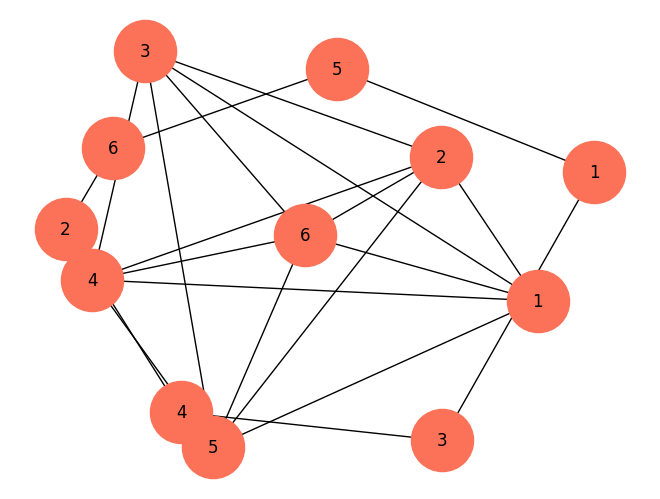

In [ ]:
#Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
#циклов решения задачи методом отжига по вариантам ниже.



distances = [(1, 2, 17), (1, 3, 39), (1, 4, 32),
             (1, 5, 28), (1, 6, 18), (2, 3, 24),
             (2, 4, 28), (2, 5, 35), (2, 6, 13),
             (3, 4, 25), (3, 5, 43), (3, 6, 23),
             (4, 5, 20), (4, 6, 16), (5, 6, 24)]

V = [1, 3,4,5,6,2,1]

Z = [(2,4), (4, 6),
     (3, 5), (5, 2)]

P = [51,23,29,31]
T = 100


def probability(delta, T):
    return 100 * e ** (-delta / T)


def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT


graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or
                                (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])


def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)


def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV


def routeReplacement (V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V


def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) 
    arrSum = [sumLength] 

    for i in range(len(Z)):
        newV = routeOneReplacement (V[:], Z[i]) 
        newS = routeLength(newV, distances) 
        arrSum.append(newS)
        deltaS = newS - sumLength 

        if deltaS > 0:
            p = probability(deltaS, T) 
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T)
    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)


    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
print(drawRouteGraph(distances, bestRoute))

In [ ]:
#Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
#циклов решения задачи методом отжига
vertices = [1, 2, 3, 4, 5, 6]
edges = list(permutations(vertices, 2))
def cycle_length(cycle, edges):
    length = 0
    for i in range(len(cycle) - 1):
        edge = (cycle[i], cycle[i + 1])
        if edge in edges:
            length += 1
        else:
            length += 2
    return length
def generate_random_cycle(vertices):
    cycle = list(vertices)
    random.shuffle(cycle)
    return cycle
def simulated_annealing(vertices, edges, iterations):
    current_cycle = generate_random_cycle(vertices)
    current_length = cycle_length(current_cycle, edges)
    T = 1.0
    T_min = 0.0001
    alpha = 0.9
    for i in range(iterations):
        T = T * alpha
        if T < T_min:
            break

    new_cycle = generate_random_cycle(vertices)
    new_length = cycle_length(new_cycle, edges)

    delta = new_length - current_length
    if delta < 0 or random.random() < math.exp(-delta / T):
        current_cycle = new_cycle
        current_length = new_length

    return current_cycle, current_length
best_cycle = []
best_length = float('inf')

for i in range(4):
    cycle, length = simulated_annealing(vertices, edges, 10000)
    if length < best_length:
        best_cycle = cycle
        best_length = length
print("Длина гамильтонова цикла в K6 после четырех циклов метода отжига:", best_length)
print("Гамильтонов цикл:", best_cycle)

Длина гамильтонова цикла в K6 после четырех циклов метода отжига: 5
Гамильтонов цикл: [4, 1, 2, 6, 3, 5]
